In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# import the data
df = pd.read_csv('train.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,2,-56,-0.33,-0.09,0.90,0.2,-11,12,0.004,-0.1,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.032,-0.0009
1,470,-39,0.02,0.12,0.39,-0.6,-12,8,0.009,-1.6,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.034,-0.0011
2,165,4,0.14,0.14,0.78,0.4,-11,-9,-0.003,-0.2,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.034,-0.0012
3,-113,5,-0.12,0.11,1.06,0.6,-10,-7,-0.008,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.033,-0.0011
4,-411,-21,-0.17,0.07,1.33,-0.6,-11,0,0.002,0.1,...,0.0,0.0,0.0,0.0,0.0,-0.002,0.0,0.9,0.032,-0.0008


In [3]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7154 entries, 0 to 7153
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7154 non-null   int64  
 1   1       7154 non-null   int64  
 2   2       7154 non-null   float64
 3   3       7154 non-null   float64
 4   4       7154 non-null   float64
 5   5       7154 non-null   float64
 6   6       7154 non-null   int64  
 7   7       7154 non-null   int64  
 8   8       7154 non-null   float64
 9   9       7154 non-null   float64
 10  10      7154 non-null   float64
 11  11      7154 non-null   float64
 12  12      7154 non-null   float64
 13  13      7154 non-null   float64
 14  14      7154 non-null   float64
 15  15      7154 non-null   float64
 16  16      7154 non-null   float64
 17  17      7154 non-null   float64
 18  18      7154 non-null   float64
 19  19      7154 non-null   float64
 20  20      7154 non-null   float64
 21  21      7154 non-null   float64
 22  

In [4]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
dtype: int64

In [5]:
# define TreeNode
class Node(object):
    def __init__(self):
        self.left = None  # 左孩子
        self.right = None  # 右孩子
        self.feature = None  # 划分特征
        self.value = None  # 划分值
        self.w = None  # 权值
        self.isleaf = False  # 是否为叶节点
        self.depth = None  # 节点深度

In [6]:
class DecisionTree(object):
    def __init__(self, data, gamma, Lambda, max_depth, min_gain, min_num):
        self.gamma = gamma
        self.Lambda = Lambda
        self.max_depth = max_depth
        self.feature = None
        self.value = None
        self.min_gain = min_gain
        self.min_num = min_num
        self.root = self.BuildTree(data, 0)

    def GetObj(self, G, H):
        return -0.5 * (G ** 2) / (H + self.Lambda) + self.gamma

    def GetWeight(self, data):
        G = -2 * np.sum(data[:, -2] - data[:, -1])
        H = 2 * data.shape[0]
        return -G / (H + self.Lambda)

    def ChooseBestSplit(self, data, depth):
        # 树的深度大于某个阈值, 停止划分
        if depth > self.max_depth:
            return None, self.GetWeight(data)

        y_t, y = data[:, -1], data[:, -2]

        # 所有特征值都相同，停止划分
        if len(set(y.T.tolist())) == 1:
            return None, self.GetWeight(data)

        m, n = np.shape(data)

        # 样本数目小于某个阈值，停止划分
        if m < self.min_num:
            return None, self.GetWeight(data)

        G = np.sum(-2 * (y - y_t))
        H = 2 * m
        Obj_p = self.GetObj(G, H)
        max_gain = float("-inf")
        BestFeature = 0
        BestValue = 0

        # 遍历属性
        for feature in range(n - 2):
            # 特征值排序
            tmp = np.c_[data[:, feature], -2 * (y - y_t)]
            sorted_value_list = tmp[np.argsort(tmp[:, 0])]
            Gl, Gr, Hl, Hr = 0, G, 0, H
            # 遍历特征值
            for i in range(sorted_value_list.shape[0]):
                # <=i,划分到左子树
                Gl += sorted_value_list[i, -1]
                Gr = G - Gl
                Hl += 2
                Hr = H - Hl
                Obj_l = self.GetObj(Gl, Hl)
                Obj_r = self.GetObj(Gr, Hr)
                gain = Obj_p - Obj_l - Obj_r
                if gain > max_gain:
                    max_gain = gain
                    BestFeature = feature
                    BestValue = sorted_value_list[i, 0]

        # 增益小于某个阈值, 停止划分
        if max_gain < self.min_gain:
            return None, self.GetWeight(data)

        return BestFeature, BestValue

    def BuildTree(self, data, depth):
        # 选择最优化划分
        feature, value = self.ChooseBestSplit(data, depth)

        # 满足停止条件，返回叶节点值
        if feature == None:
            leaf = Node()
            leaf.depth = depth
            leaf.isleaf = True
            leaf.w = self.GetWeight(data)
            return leaf

        # 划分后赋值
        else:
            root = Node()
            root.depth = depth
            root.feature = feature
            root.value = value
            left = data[np.nonzero(data[:, feature] <= value)[0], :]
            right = data[np.nonzero(data[:, feature] > value)[0], :]
            root.left = self.BuildTree(left, depth + 1)
            root.right = self.BuildTree(right, depth + 1)
            return root

    def infer(self, x):
        p = self.root
        while not p.isleaf:
            if x[p.feature] <= p.value:
                p = p.left
            elif x[p.feature] > p.value:
                p = p.right
        return p.w

In [7]:
class XGBoost(object):
    def __init__(self, gamma, Lambda, max_depth, tree_num, min_gain, min_num):
        self.gamma = gamma
        self.Lambda = Lambda
        self.max_depth = max_depth
        self.tree_num = tree_num  # 决策树个数
        self.min_gain = min_gain
        self.min_num = min_num
        self.TreeList = []

    def fit(self, X, y):
        y_t = np.zeros(y.shape)
        data = np.c_[X, y, y_t]
        LossList = []
        for i in range(self.tree_num):
            print(f"Bulid {i + 1} tree")
            tree = DecisionTree(data, self.gamma, self.Lambda, self.max_depth, self.min_gain, self.min_num)
            self.TreeList.append(tree)
            data[:, -1] = self.predict(X)
            loss = np.mean((y - data[:, -1]) ** 2)
            LossList.append(loss)
        return LossList, data[:, -1]

    def predict(self, X):
        if len(self.TreeList) == 0:
            print("TreeList is empty!")
        else:
            m = X.shape[0]
            y_pred = np.zeros(m)
            for i in range(m):
                for tree in self.TreeList:
                    y_pred[i] += tree.infer(X[i, :])
            return y_pred

In [8]:
# split the dataset into X_train, X_test, y_train, y_test
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
fold = int(len(y) / 10)
X_train = X[:7 * fold].values
y_train = y[:7 * fold].values
X_test = X[-3 * fold:].values
y_test = y[-3 * fold:].values

In [9]:
def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def RMSE(y_true, y_pred):
    return np.sqrt(MSE(y_true, y_pred))

def R2(y_true, y_pred):
    return 1 - MSE(y_true, y_pred) / np.var(y_true)

Bulid 1 tree
Bulid 2 tree
Bulid 3 tree
Bulid 4 tree
Bulid 5 tree
Bulid 6 tree
Bulid 7 tree
Bulid 8 tree
Bulid 9 tree
Bulid 10 tree
Bulid 11 tree
Bulid 12 tree
训练12棵树耗时：13.444096399995033
训练集RMSE : 0.00018041152294367527
训练集R^2 : 0.8120102661912713


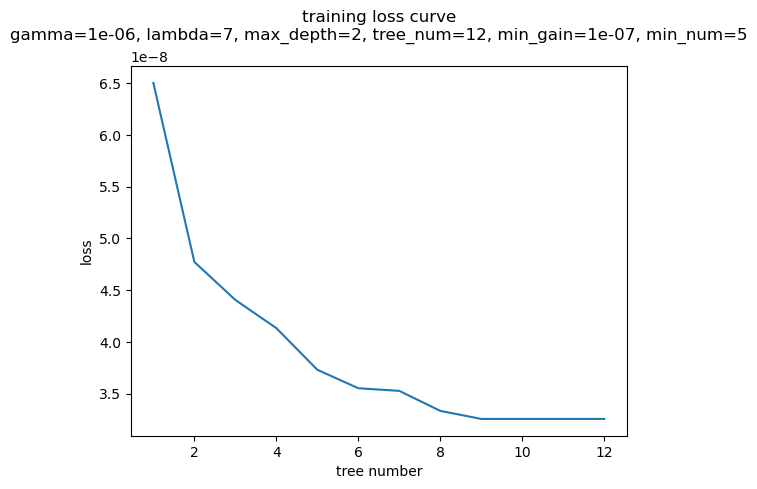

测试集RMSE : 0.00018454935418802407
测试集R^2 : 0.7895570299893997


In [69]:
import time

# train
t1 = time.perf_counter()
gamma, Lambda, max_depth, tree_num, min_gain, min_num = 1e-6, 7, 2, 12, 1e-7, 5
XGB = XGBoost(gamma=gamma, Lambda=Lambda, max_depth=max_depth, tree_num=tree_num, min_gain=min_gain, min_num=min_num)
LossList, y_train_pred = XGB.fit(X_train, y_train)
t2 = time.perf_counter()
t = t2 - t1
print(f"训练{tree_num}棵树耗时：{t}")
print(f"训练集RMSE : {RMSE(y_train, y_train_pred)}")
print(f"训练集R^2 : {R2(y_train, y_train_pred)}")

# draw loss curve
plt.plot(np.arange(tree_num) + 1, LossList)
plt.xlabel("tree number")
plt.ylabel("loss")
plt.title(
    f"training loss curve\ngamma={gamma}, lambda={Lambda}, max_depth={max_depth}, tree_num={tree_num}, min_gain={min_gain}, min_num={min_num}\n")
plt.show()

# test
y_test_pred = XGB.predict(X_test)

# evaluation
print(f"测试集RMSE : {RMSE(y_test, y_test_pred)}")
print(f"测试集R^2 : {R2(y_test, y_test_pred)}")

In [77]:
from sklearn import tree

clf = tree.DecisionTreeRegressor(max_depth=7)
clf = clf.fit(X_train, y_train)
y_test_pred2 = clf.predict(X_test)
print(f"测试集RMSE : {RMSE(y_test, y_test_pred2)}")
print(f"测试集R^2 : {R2(y_test, y_test_pred2)}")

测试集RMSE : 0.00020274704403556388
测试集R^2 : 0.7460089431868516
